In [1]:
import numpy as np
import pandas as pd
import pickle as pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/jfear/devel/GalaxyTools')
from runOrderRegression import *

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
%qtconsole

In [17]:
trans = pickle.load(open('/home/jfear/tmp/trans.pkl', 'rb'))

In [25]:
results = trans.apply(runOrder, axis=0)

In [89]:
row = results[0]
name, x, y, res = row
fitted = res.fittedvalues

# Get 95% CI
prstd, lower, upper = wls_prediction_std(res)

In [84]:
slope = res.params['run']
pval = res.pvalues['run']
xs = x.values.tolist()
xs.sort()

us = upper.values.tolist()
ls = lower.values.tolist()
us.sort()
ls.sort()

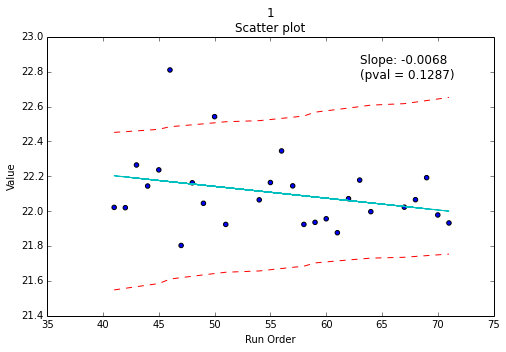

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y)
ax.plot(xs, ls, 'r--')
ax.plot(x, fitted, 'c-')
ax.plot(xs, upper, 'r--')
ax.set_xlabel('Run Order')
ax.set_ylabel('Value')
ax.set_title(u'{}\nScatter plot'.format(name))
ax.text(.7, .85, u'Slope: {0:.4f}\n(pval = {1:.4f})'.format(slope, pval, '%.4f'), transform=ax.transAxes, fontsize=12)

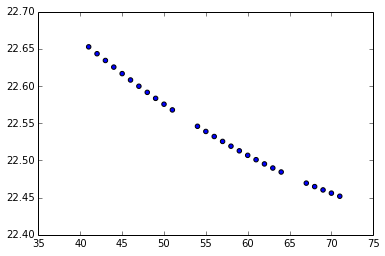

In [43]:
plt.scatter(x, upper)

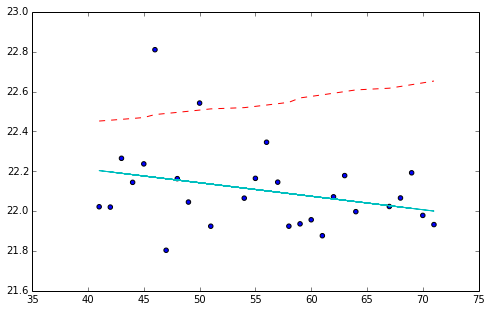

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y)
ax.plot(x, fitted, 'c-')
ax.plot(bob, u, 'r--')